<b style = " font-size: 38px; color:rgb(247, 194, 199);">
Introduction
</b><br><br>

# Spam Identifier Project

In today's digital age, users are constantly bombarded with unsolicited and irrelevant messages—commonly known as **spam**. These messages can clutter inboxes, spread misinformation, or even pose serious security threats through phishing and malware.

This project aims to develop a **Spam Identifier**, a machine learning model that can automatically classify messages as either **spam** (unwanted) or **ham** (legitimate). Using natural language processing (NLP) techniques, the system analyzes the content of messages to detect patterns and keywords commonly associated with spam.

To build and test this model, we use publicly available datasets such as the **SMS Spam Collection**, which contains thousands of labeled text messages. The model is trained using various classifiers like Naive Bayes, Decision Trees, Random Forest, and Gradient Boosting, and its performance is evaluated using metrics like accuracy, precision, recall, and F1-score.

Ultimately, the goal is to create a reliable, efficient, and scalable spam detection system that can be integrated into messaging apps, email clients, or online platforms to enhance user experience and security.

<b style = " font-size: 38px; color:rgb(247, 194, 199);">
Importing Necessary Libraries, Packeges, Module and Dataset Required For Project Success
</b><br><br>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import seaborn as sns
sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import spacy


In [ ]:
#load dataframe
df = pd.read_csv("C:/Users/Namshima/Documents/Projects/Datasets/spam.csv", encoding = 'latin1')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<b style = " font-size: 38px; color:rgb(247, 194, 199);">
Data Inspection And Exploration
</b><br><br>

In [ ]:
# inspecting for missing values
df.isna().sum().to_frame()

,0
v1,0
v2,0


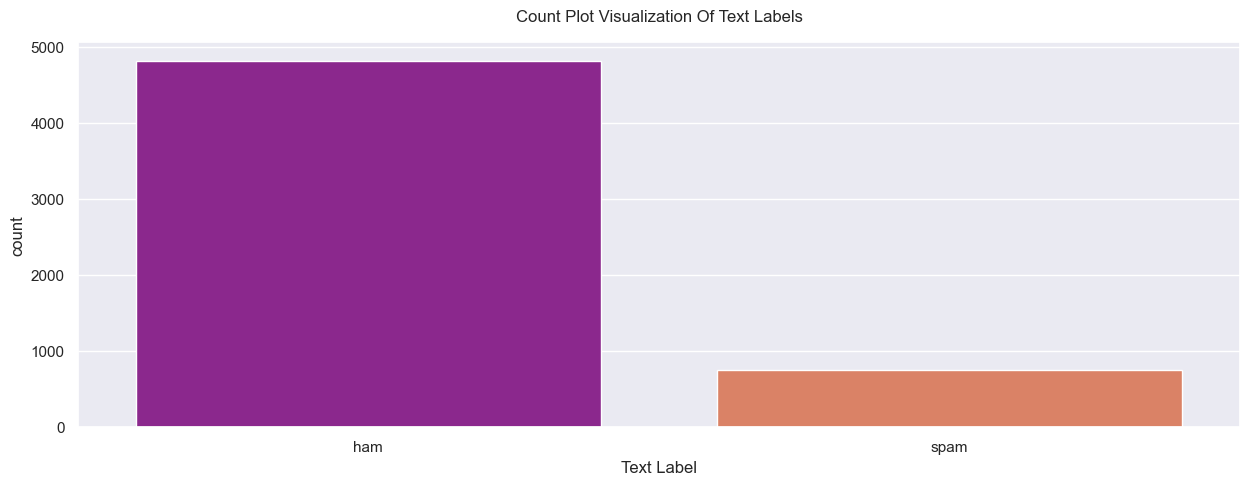

In [ ]:
#inspection
sns.countplot(x = 'v1', data = df, palette = "plasma")
plt.xlabel("Text Label")
plt.title("Count Plot Visualization Of Text Labels", pad = 15)
plt.show()

<b style = " font-size: 38px; color:rgb(247, 194, 199);">
Feature Engineering, Model Building And Evaluation
</b><br><br>

In [ ]:
# mapping the target values
df['target'] = df['v1'].map({'spam' : 1, 'ham' : 0})

In [ ]:
# assigning explanatory and predictive variables 
x = df['v2']
y = df['target'] 

In [ ]:
# instantiate the countvertorizer
vector = CountVectorizer(lowercase = True, strip_accents = 'ascii', stop_words = 'english')

In [ ]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [ ]:
# bag of words
x_train_bow = vector.fit_transform(x_train)
x_test_bow = vector.transform(x_test)

In [ ]:
# instantiating classifiers
classifiers = [
    DecisionTreeClassifier(random_state = 0),
    RandomForestClassifier(random_state = 0),
    GradientBoostingClassifier(random_state = 0),
    MultinomialNB(),
    xgboost.XGBClassifier(random_state = 0)
]

In [ ]:
# mapping classifiers to id
classifiers_id = {
    0 : "Decision Tree Classifier",
    1 : "Random Forest Classifier",
    2 : "Gradient Boosting Classifier",
    3 : "Naive Bayes",
    4 : "Xgb Classfier"    
}

In [ ]:
#training
for i, model in enumerate(classifiers):
    model.fit(x_train_bow, y_train)
    train_pred = model.predict(x_train_bow)
    print(f"{classifiers_id[i]}: {accuracy_score(train_pred, y_train)}")
    print()

Decision Tree Classifier: 1.0

Random Forest Classifier: 1.0

Gradient Boosting Classifier: 0.974646623289208

Naive Bayes: 0.9946152120260264

Xgb Classfier: 0.9874354947273951



In [ ]:
# cross validation
for i, cls in enumerate(classifiers):
    cvs = cross_val_score(model, x_train_bow, y_train, scoring = "accuracy", cv = 5)
    print(f"{classifiers_id[i]}: {cvs.mean()}")
    print()

Decision Tree Classifier: 0.9726268665730551

Random Forest Classifier: 0.9726268665730551

Gradient Boosting Classifier: 0.9726268665730551

Naive Bayes: 0.9726268665730551

Xgb Classfier: 0.9726268665730551



In [ ]:
# predicting
for i, model in enumerate(classifiers):
    print(f"{classifiers_id[i]}: {accuracy_score(y_test, model.predict(x_test_bow))}")
    print()


Decision Tree Classifier: 0.9713004484304932

Random Forest Classifier: 0.9748878923766816

Gradient Boosting Classifier: 0.9641255605381166

Naive Bayes: 0.9883408071748879

Xgb Classfier: 0.9766816143497757



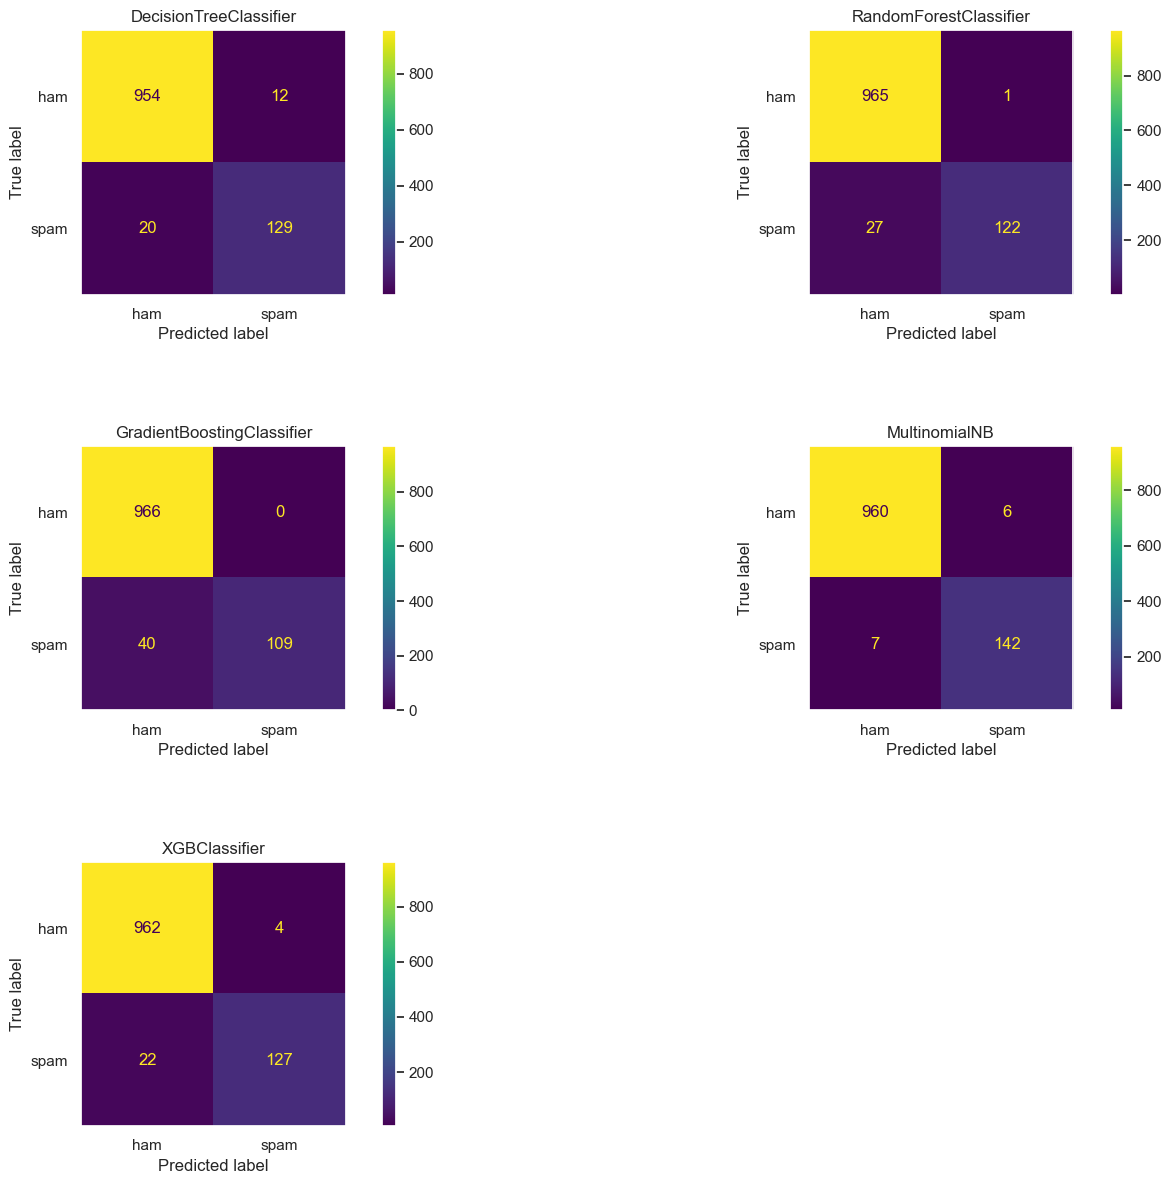

In [ ]:
# visualizing confusion matrix 
fig, ax = plt.subplots(3, 2, figsize = [15, 12])
ax = ax.flatten()

for i, model in enumerate(classifiers):
    cm = confusion_matrix(y_test, model.predict(x_test_bow))
    disp = ConfusionMatrixDisplay(cm, display_labels = ['ham', 'spam'])
    disp.plot(cmap = plt.cm.viridis, ax = ax[i])
    ax[i].set_title(type(model).__name__)
    ax[i].grid(False)
    

if len(classifiers) < len(ax):
    for j in range(len(classifiers), len(ax)):
        fig.delaxes(ax[j])

plt.tight_layout(h_pad = 5)
plt.show()

According to the Evalution I was able to observe the execptional performance of the Naive Bayes Classifier achieving a test score of **0.984**
and as seen in the confusion matrix visualization it's performance was also great 

In [ ]:
# print classfication report 
for i, model in enumerate(classifiers):
    print(classifiers_id[i])
    print('\n', classification_report(y_test, model.predict(x_test_bow)))
    print()


Decision Tree Classifier

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.87      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115


Random Forest Classifier

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.82      0.90       149

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Gradient Boosting Classifier

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.